# FashionMNIST

![gif](assets/embedding.gif)


You should solve the FashionMNIST problems and be able to recognize clothes thanks to AI.

	If necessary you can un-comment the next line and run it to install this notebook depedencies

In [1]:
!pip install torch torchvision numpy matplotlib

In [2]:
import torch
from torchvision import datasets, transforms
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Transform each image into tensor
transform = transforms.Compose([transforms.ToTensor()])

# Set the training loader
train_data = datasets.FashionMNIST('../data', train=True, download=True, transform=transform)
# Set the testing loader
test_data = datasets.FashionMNIST('../data', train=False, download=True, transform=transform)

# The dataset

 - `train_data` is only for training your model.
 - `test_data`  is only for testing your model.

## Shape

```python
train_data = [
	[image], [label] # 1st example
	[image], [label] # 2nd example
	[image], [label] # 3rd example
	[image], [label] # 4th example
	... # 4th example
]
```

There's 60 000 examples in the train set, and 10 000 in the test set

### Image

An image is 28*28 in black & white 

You can access the first image this way:

```python
image_0 = data[0][0]
```

### Label

A label is an integer between 0 and 9 (included) 

You can access the first label this way:

```python
label_0 = data[0][0]
```

Here is the detail of each label

| Label | Description |
|:-|:-:|
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |



In [4]:
print("Train len : " + str(len(test_data)))
print("Test len : " + str(len(train_data)))

Train len : 10000
Test len : 60000


In [5]:
print("Image Size: " + str(train_data[0][0].shape))

Image Size: torch.Size([1, 28, 28])


In [6]:
label_dic = {
	0: "T-shirt/top",
	1: "Trouser",
	2 : "Pullover ",
	3 : "Dress ",
	4 : "Coat ",
	5 : "Sandal ",
	6 : "Shirt ",
	7 : "Sneaker ",
	8 : "Bag ",
	9 : "Ankle boot"
}

def plot_one_example(example):
	plt.imshow(example[0].view(28, 28), cmap="gray")
	plt.title("Label class {}: {}".format(example[1], label_dic[example[1]]))
	plt.show()

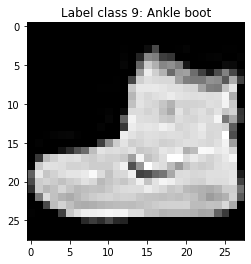

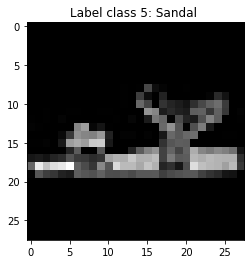

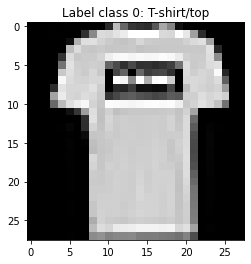

In [7]:
plot_one_example(train_data[0])
plot_one_example(train_data[-1])
plot_one_example(train_data[1])

Time to train a model to predict the label of an image !

# 🚀 Good Luck 

In [8]:
# Your code here

In [2]:
import torchvision
import torchvision.transforms as transforms

import os.path

 ############################################################################################ Datasets

dataset_dir = os.path.join(os.path.expanduser("~"), 'Datasets', 'FashionMNIST')
valid_ratio = 0.2  # Going to use 80%/20% split for train/valid

# Load the dataset for the training/validation sets
train_valid_dataset = torchvision.datasets.FashionMNIST(root=dataset_dir,
                                           train=True,
                                           transform= None, #transforms.ToTensor(),
                                           download=True)

# Split it into training and validation sets
nb_train = int((1.0 - valid_ratio) * len(train_valid_dataset))
nb_valid =  int(valid_ratio * len(train_valid_dataset))
train_dataset, valid_dataset = torch.utils.data.dataset.random_split(train_valid_dataset, [nb_train, nb_valid])


# Load the test set
test_dataset = torchvision.datasets.FashionMNIST(root=dataset_dir,
                                                 transform= None, #transforms.ToTensor(),
                                                 train=False)

Extracting /Users/clementloeuillet/Datasets/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to /Users/clementloeuillet/Datasets/FashionMNIST/FashionMNIST/raw

Extracting /Users/clementloeuillet/Datasets/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /Users/clementloeuillet/Datasets/FashionMNIST/FashionMNIST/raw

Extracting /Users/clementloeuillet/Datasets/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /Users/clementloeuillet/Datasets/FashionMNIST/FashionMNIST/raw

Extracting /Users/clementloeuillet/Datasets/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /Users/clementloeuillet/Datasets/FashionMNIST/FashionMNIST/raw



11.6%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

32.8%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

56.3%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

80.1%IOPub

NameError: name 'torch' is not defined